# Busca Linear

In [1]:
def busca_linear(lista, valor):
    for i in range(len(lista)):
        if lista[i] == valor:
            return i
    return None

In [2]:
lista = [3, 5, 2, 9, 6]
valor = 9

resultado = busca_linear(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 7
resultado = busca_linear(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


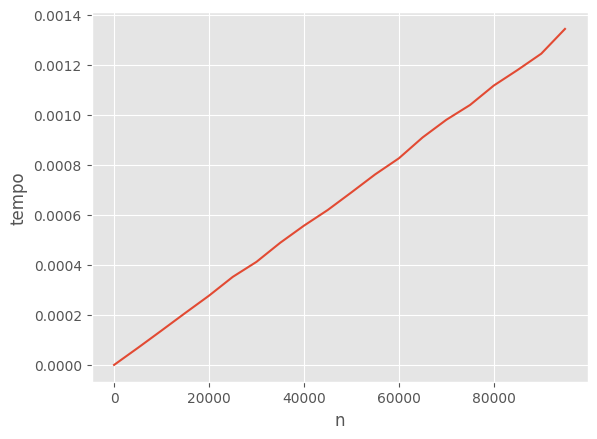

In [3]:
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')


x = []
y = []

for n in range(1,100000,5000):
    # cria um array de tamanho n
    array = [random.randint(0,100) for _ in range(n)]
    # mede o tempo da busca (procurando pelo valor -1)
    t = %timeit -o -r 3 -n 10 -q busca_linear(array, -1)
    # guarda os valores
    x.append(n)
    y.append(t.best)

# mostra o gráfico
plt.xlabel('n')
plt.ylabel('tempo')
plt.plot(x,y)
plt.show()

# Busca Linear Ordenada

In [4]:
def busca_linear_ordenado(lista, valor):
    for i in range(len(lista)):
        if lista[i] == valor:
            return i
        elif lista[i] > valor:
            return None  # Se o valor atual é maior que o valor procurado, podemos parar a busca
    return None

In [5]:
lista = [1, 3, 5, 7, 9, 11]
valor = 7

resultado = busca_linear_ordenado(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 8
resultado = busca_linear_ordenado(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


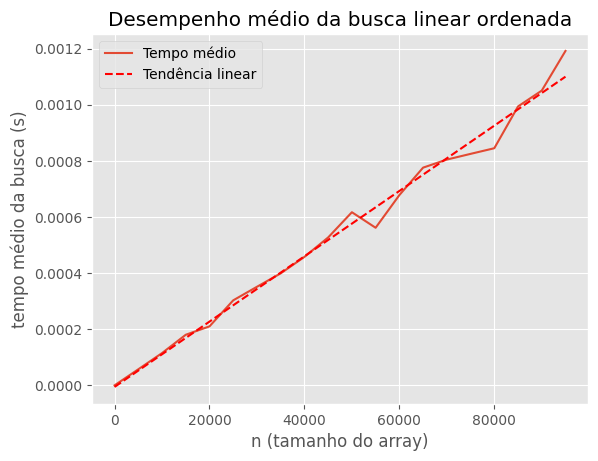

In [6]:
import matplotlib.pyplot as plt
import random
import timeit
import numpy as np

x = []
y = []

# Number of repetitions for averaging
repetitions = 100

for n in range(1, 100000, 5000):
    # cria um array ordenado de tamanho n
    array = sorted(random.randint(0, 10000) for _ in range(n))
    
    # mede o tempo médio da busca usando valores aleatórios do próprio array
    def average_case():
        target = random.choice(array)  # elemento aleatório do array
        busca_linear_ordenado(array, target)
    
    t = timeit.timeit(average_case, number=repetitions)
    
    # guarda os valores
    x.append(n)
    y.append(t / repetitions)  # média do tempo por execução

# mostra o gráfico
plt.xlabel('n (tamanho do array)')
plt.ylabel('tempo médio da busca (s)')
plt.plot(x, y, label='Tempo médio')

# linha de tendência
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", label='Tendência linear')

plt.legend()
plt.title("Desempenho médio da busca linear ordenada")
plt.grid(True)
plt.show()


# Binary Search

In [7]:
def busca_binaria(lista, valor):
    inicio = 0
    fim = len(lista) - 1
    
    while inicio <= fim:
        meio = (inicio + fim) // 2
        if lista[meio] == valor:
            return meio
        elif lista[meio] < valor:
            inicio = meio + 1
        else:
            fim = meio - 1
    
    return None

In [8]:
lista = [1, 3, 5, 7, 9, 11, 13]
valor = 7

resultado = busca_binaria(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 4
resultado = busca_binaria(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


In [13]:
def busca_binaria(lista, valor, inicio=0, fim=None):
    if fim is None:
        fim = len(lista) - 1

    if inicio > fim:
        return None  # Elemento não encontrado

    meio = inicio + (fim - inicio) // 2

    if lista[meio] == valor:
        return meio
    elif lista[meio] < valor:
        return busca_binaria(lista, valor, meio + 1, fim)
    else:
        return busca_binaria(lista, valor, inicio, meio - 1)


In [14]:
lista = [1, 3, 5, 7, 9, 11, 13]
valor = 7

resultado = busca_binaria(lista, valor)
print(resultado)  # Saída: 3

valor_nao_existe = 4
resultado = busca_binaria(lista, valor_nao_existe)
print(resultado)  # Saída: None

3
None


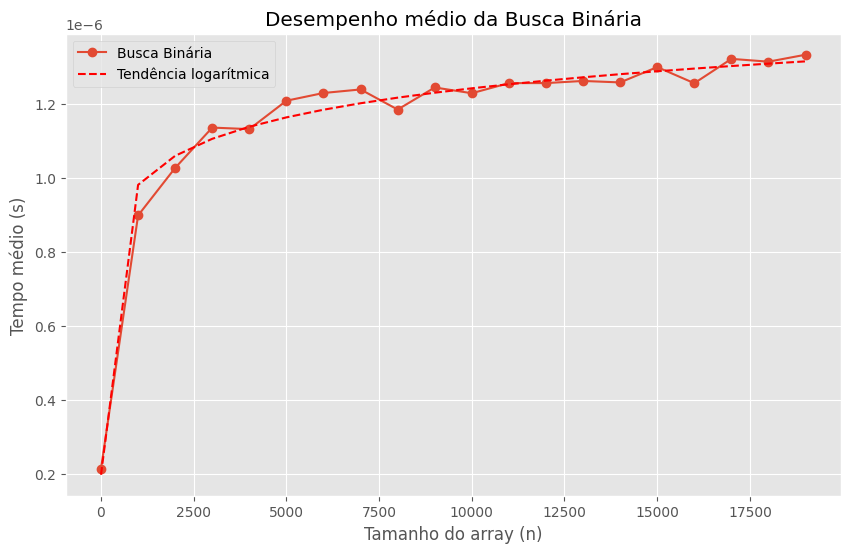

In [16]:
import matplotlib.pyplot as plt
import random
import numpy as np

size    = []  # Tamanho do problema
timeBB  = []  # Tempo médio da busca binária

for n in range(1, 20000, 1000):
    array = sorted(random.randint(0, 1000000) for _ in range(n))

    # Mede o tempo médio da busca binária com elementos aleatórios do array
    t = %timeit -o -r 3 -n 1000 -q busca_binaria(array, random.choice(array))

    size.append(n)
    timeBB.append(t.best)

# Plotando gráfico do desempenho médio da busca binária
plt.figure(figsize=(10, 6))
plt.plot(size, timeBB, marker='o', label='Busca Binária')

# linha de tendência logarítmica
fit = np.polyfit(np.log(size), timeBB, 1)
trend = fit[0] * np.log(size) + fit[1]
plt.plot(size, trend, "r--", label='Tendência logarítmica')

plt.xlabel('Tamanho do array (n)')
plt.ylabel('Tempo médio (s)')
plt.title('Desempenho médio da Busca Binária')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()
